In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DJI = pd.read_csv("Index DJI Parsial 3.csv")

In [3]:
print(DJI)

            Date     Adj Close
0     1985-01-29   1292.619995
1     1985-01-30   1287.880005
2     1985-01-31   1286.770020
3     1985-02-01   1277.719971
4     1985-02-04   1290.079956
...          ...           ...
5757  2007-11-26  12743.440430
5758  2007-11-27  12958.440430
5759  2007-11-28  13289.450195
5760  2007-11-29  13311.730469
5761  2007-11-30  13371.719727

[5762 rows x 2 columns]


In [4]:
#Metode Geometric Brownian Motion pada Index DJI pada beberapa Timeline

In [5]:
#Geometric Brownian Motion dapat digunakan untuk memprediksi ada atau tidaknya
#penurunan harga yang diakibatkan oleh krisis yang terjadi

In [6]:
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

In [7]:
#Set Prediction Date
start_date = '1985-01-29'
end_date = '2007-11-30'
pred_end_date = '2009-06-30'

#Set Return Value
returns = (DJI.loc[1:, 'Adj Close'] - \
           DJI.shift(1).loc[1:, 'Adj Close']) / \
           DJI.shift(1).loc[1:, 'Adj Close']
print(returns.tolist())

[-0.0036669632361675127, -0.0008618698913646474, -0.007033151891431186, 0.009673469367725842, -0.0037594383025977107, -0.0036102596984238294, 0.007410639042911285, -8.525440573549343e-05, -0.010783128532222304, 0.00043095620470332533, 0.01669269334439673, -0.007735483434756154, -0.004550101699886281, -0.0011154693200500312, 0.001983491255935687, -0.0031874915122104123, -0.0025019334050730016, 0.0013011302704402004, 0.006739714285714326, -0.0039498612554509, 0.002326238208737535, 0.011954715991661223, -0.007565229123167155, 0.00179906395960319, -0.00888646608605886, -0.006904227711146889, -0.0014706652279936182, -0.000874237961561332, 0.0025225264092044158, -0.007902535089443637, -0.0013076817500804602, -0.010079022662694231, 0.0018599976306890088, 0.01714046207864453, -0.004602330406563818, 0.0023552693746266688, -0.0006071659630093708, -0.0059252911675720795, -0.0001745876869539633, 0.004120013272378302, -0.0033204519587200737, 0.004814801332405742, 0.004712713228288498, -0.0055548583

In [8]:
#Parameter Assignments
#So
So = DJI.loc[DJI.shape[0] - 1, "Adj Close"]
print(So)

13371.719727


In [9]:
dt = 1 #day #user input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
              format = "%Y-%m-%d") + pd.Timedelta('1 days'),
              end = pd.to_datetime(pred_end_date,
              format = "%Y-%m-%d")).to_series().map(lambda x:
              1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays #days #user input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 #user input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range (1, scen_size + 1)}

In [10]:
#Calcualting drift and diffusion components 
drift = (mu - 0.5 * sigma ** 2) * t
print(drift)

[0.0004065  0.00081301 0.00121951 0.00162602 0.00203252 0.00243903
 0.00284553 0.00325204 0.00365854 0.00406504 0.00447155 0.00487805
 0.00528456 0.00569106 0.00609757 0.00650407 0.00691058 0.00731708
 0.00772358 0.00813009 0.00853659 0.0089431  0.0093496  0.00975611
 0.01016261 0.01056912 0.01097562 0.01138212 0.01178863 0.01219513
 0.01260164 0.01300814 0.01341465 0.01382115 0.01422766 0.01463416
 0.01504066 0.01544717 0.01585367 0.01626018 0.01666668 0.01707319
 0.01747969 0.0178862  0.0182927  0.01869921 0.01910571 0.01951221
 0.01991872 0.02032522 0.02073173 0.02113823 0.02154474 0.02195124
 0.02235775 0.02276425 0.02317075 0.02357726 0.02398376 0.02439027
 0.02479677 0.02520328 0.02560978 0.02601629 0.02642279 0.02682929
 0.0272358  0.0276423  0.02804881 0.02845531 0.02886182 0.02926832
 0.02967483 0.03008133 0.03048783 0.03089434 0.03130084 0.03170735
 0.03211385 0.03252036 0.03292686 0.03333337 0.03373987 0.03414637
 0.03455288 0.03495938 0.03536589 0.03577239 0.0361789  0.0365

In [11]:
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print(diffusion)

{'1': array([-0.00687683, -0.03172558, -0.05023319, -0.07047213, -0.10578968,
       -0.08901321, -0.09221053, -0.10241764, -0.12494816, -0.12184027,
       -0.13317604, -0.12521673, -0.14977612, -0.14017918, -0.15736316,
       -0.16131505, -0.15854205, -0.15730117, -0.16686044, -0.15881889,
       -0.15606512, -0.16187876, -0.1826704 , -0.18798558, -0.19632366,
       -0.18375233, -0.16853746, -0.17933551, -0.1823364 , -0.19499494,
       -0.20991902, -0.21016109, -0.20913961, -0.19281487, -0.21155902,
       -0.21430532, -0.19704584, -0.20608918, -0.20703099, -0.20170184,
       -0.19847319, -0.21174399, -0.19838654, -0.19762385, -0.20814192,
       -0.21356271, -0.22424644, -0.22493385, -0.22727136, -0.22721515,
       -0.22012097, -0.20335576, -0.20977937, -0.20907153, -0.22980306,
       -0.22055743, -0.22571035, -0.22800545, -0.22606695, -0.20898318,
       -0.20446048, -0.18881886, -0.20298614, -0.20588255, -0.21420626,
       -0.20717149, -0.22440987, -0.24235007, -0.24568565,

In [12]:
#Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series 
print(S)

[[13371.719727   13285.47962762 12964.68909667 ... 11390.31961716
  11346.83282341 11438.61119765]
 [13371.719727   13241.1562468  13442.63363623 ... 22447.25949089
  22315.25527458 22030.07625232]
 [13371.719727   13342.66748163 13311.79682619 ... 17227.32959238
  17179.19567793 17268.50040313]
 ...
 [13371.719727   13583.96459886 13513.70072198 ... 19837.80100143
  19681.40337486 19955.82046024]
 [13371.719727   13370.47058281 13250.52141931 ... 17331.92779988
  17242.85309673 16845.46767034]
 [13371.719727   13347.94445015 13429.53662533 ... 15045.55891011
  15486.98404755 15233.25594331]]


C:\Users\alfiy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


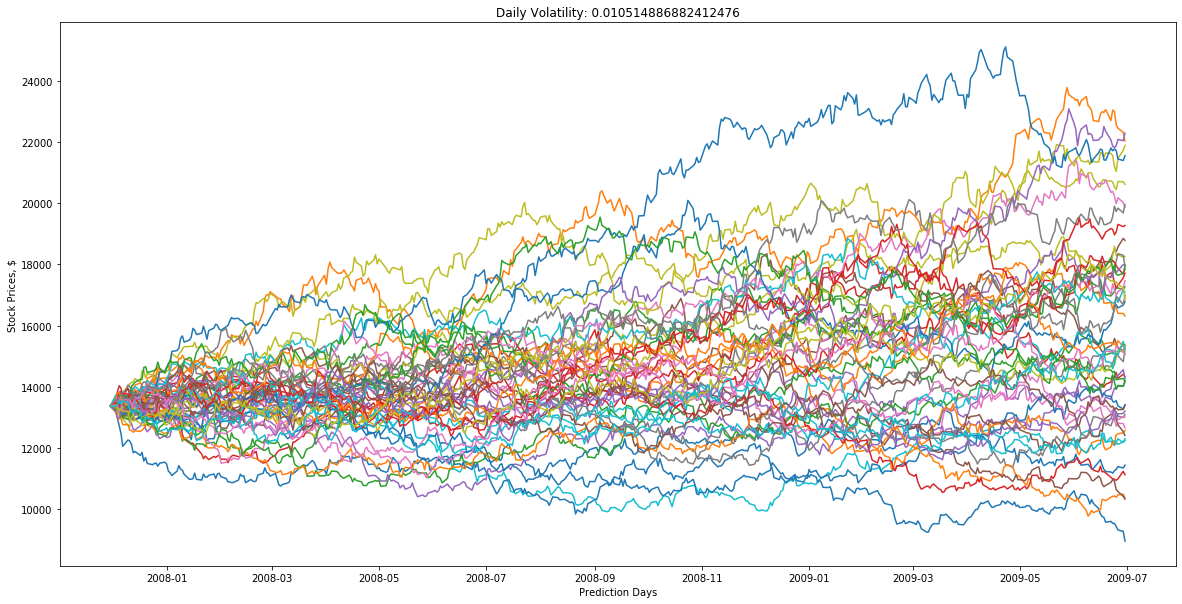

In [13]:
plt.figure(figsize = (20,10))

for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = DJI["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range (1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, $')
    plt.xlabel('Prediction Days')
    
plt.show()